In [1]:
# imports
import pandas as pd
import numpy as np
from myutils.utility import readJson, getSensorData, interpolate1D, getSensorInterpolatedData, find_event
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# This is going to take some time ~1-5 min
fields = getSensorData()

Note: sensors 8799 and 8827 are repeated in the json file!
The complete pandas frame has shape  (13984608, 10)
sensor: 6561  1st obs: 2019-01-01 00:01:07  last: 2019-12-31 23:59:37 median dt:  2  min, total obs: 236287
sensor: 8745  1st obs: 2019-01-01 00:01:06  last: 2019-12-31 23:59:47 median dt:  2  min, total obs: 188253
sensor: 8765  1st obs: 2019-01-01 00:01:30  last: 2019-12-31 23:59:52 median dt:  2  min, total obs: 192953
sensor: 8769  1st obs: 2019-01-01 00:00:52  last: 2019-12-31 23:58:53 median dt:  2  min, total obs: 184062
sensor: 8773  1st obs: 2019-01-20 02:37:25  last: 2019-12-31 23:59:00 median dt:  2  min, total obs: 139201
sensor: 8775 did not record any observation.
sensor: 8777  1st obs: 2019-01-01 00:00:46  last: 2019-12-31 23:58:07 median dt:  2  min, total obs: 189325
sensor: 8779 did not record any observation.
sensor: 8781  1st obs: 2019-01-01 00:00:43  last: 2019-10-13 12:10:43 median dt:  2  min, total obs: 137546
sensor: 8783  1st obs: 2019-01-03 06:35:16 

sensor: 9825  1st obs: 2019-01-01 00:01:51  last: 2019-12-31 23:58:31 median dt:  2  min, total obs: 145450
sensor: 10045  1st obs: 2019-01-01 00:00:11  last: 2019-12-31 23:59:55 median dt:  2  min, total obs: 204151
sensor: 10739 did not record any observation.
sensor: 10741  1st obs: 2019-01-05 09:48:27  last: 2019-12-03 09:33:40 median dt:  2  min, total obs: 178224
sensor: 11201 did not record any observation.
sensor: 11529  1st obs: 2019-01-01 00:01:54  last: 2019-12-31 23:57:37 median dt:  2  min, total obs: 202105
sensor: 12030  1st obs: 2019-01-01 00:00:34  last: 2019-12-31 23:58:29 median dt:  2  min, total obs: 203502
sensor: 12183  1st obs: 2019-01-01 00:01:18  last: 2019-12-02 23:59:31 median dt:  2  min, total obs: 186477
sensor: 12505  1st obs: 2019-01-01 00:00:06  last: 2019-12-31 23:58:23 median dt:  2  min, total obs: 184795
sensor: 12554  1st obs: 2019-01-01 00:02:14  last: 2019-12-31 23:57:46 median dt:  2  min, total obs: 206207
sensor: 12609 did not record any obse

In [3]:
# Get all the variable names
varname = list(pd.read_csv('LEUVENAIRfulldump2019.csv', skiprows=0, nrows = 0, usecols = None).columns)
print('All variable names are :', varname)

All variable names are : ['DATEUTC', 'LAT', 'LON', 'SDS011ID', 'PM2.5', 'PM10', 'DHTID', 'TEMPERATURE', 'HUMIDITY', 'OBSID']


In [4]:
sensors_la = readJson('./LEUVENAIRmeta_final.json')
keys = sensors_la.keys()
print(keys)

Note: sensors 8799 and 8827 are repeated in the json file!
dict_keys(['SDS011ID', 'DHTID', 'EXPORT', 'LAT', 'LON', 'STREET', 'POSTALCODE', 'CITY', 'HEIGHT', 'SENSOR_POSITION', 'INDUSTRY', 'WOODSTOVES', 'TRAFFIC', 'SVL', 'NO2_CN'])


In [5]:
X, Y, xaxis = getSensorInterpolatedData(fields,tstart='2019-08-01 00:00:00',tstop='2019-08-31 00:00:00',fid=4)

Extracting data over duration  30 days 00:00:00  starting at  2019-08-01 00:00:00
Sampling resolution =  1  minute


In [18]:
nanmedian = np.squeeze(np.nanmedian(Y,axis=0))
diff = np.nanmean(np.square(Y-nanmedian),axis=1)
idx = np.argsort(-1*diff)
idx

array([ 73, 108,  10,  94,  16,  27, 113,  28,  30,   8,  37,  85,  40,
        86, 112, 103,  83,  56,  24,  18,  48,  49, 101,  52,  97,  58,
        61,  62,  64,  91,  66,  67,  68,  69,  89,  72,   7,  75,  78,
         5,  46,  43,  50,  82,  21,  11,  22,  39,  23,  25,  26, 107,
        15,  14,  34,  33,  44, 111,  12,  92,  87, 110,  71,   1,  38,
        57,  76,   6,  81,  29,   9,  63,   2,  55,   4,  54,  47,  42,
        13,  32, 106,   3,  19,  65, 102,  17,  93,  79,  77,  59,  45,
        20,  41, 109,  53,  36, 105,  51,  88,  70,  99,  90, 100,  95,
        98,  74,  35,  96,  84,   0,  31, 104,  60,  80], dtype=int64)

In [19]:
anomaly = idx[0:3]
for s in anomaly:
    print(sensors_la['SDS011ID'][s], sensors_la['LAT'][s], sensors_la['LON'][s], sensors_la['STREET'][s])

9619 50.886 4.6839 's-Hertogenlaan
21569 50.8785 4.6853 Groefstraat
8785 50.9279 4.7056 Wijgmaalbroek


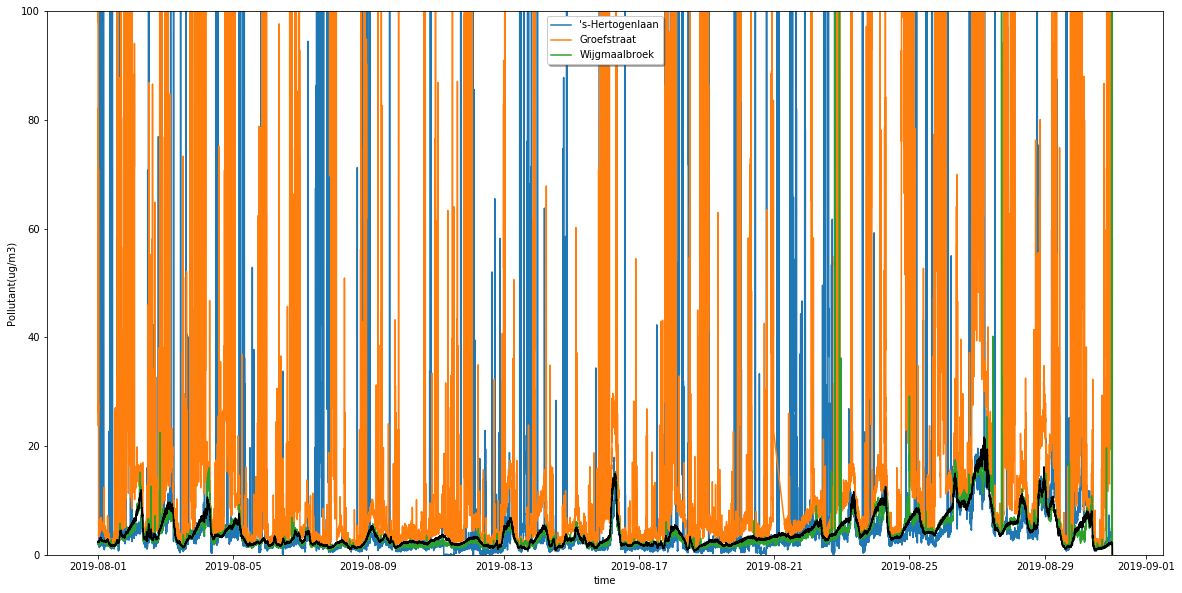

In [20]:
# Visible peak in PM2.5 at Easter
for i in anomaly:
    plt.plot(xaxis, Y[i,:], label = sensors_la['STREET'][i])
left, right = plt.xlim()
bottom, top = plt.ylim()
plt.xlim(left,right)
plt.ylim(0,100)
plt.xlabel('time')
plt.ylabel('Pollutant(ug/m3)')
legend = plt.legend(loc='upper center', shadow=True)
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.plot(xaxis, nanmedian, 'k', label = 'Median of all sensors')